## Lab 2: R in Descriptive Statistics
#### MA 189 Data Dive Into Birmingham (with R)
##### _Blazer Core: City as Classroom_

Course Website: [Github.com/kerenli/statbirmingham/](https://github.com/kerenli/statbirmingham/) 


#### Levels:
<div class="alert-success"> Concepts and general information</div>
<div class="alert-warning"> Important methods and technique details </div>
<div class="alert-info"> Extended reading </div>
<div class="alert-danger"> (Local) Examples, assignments, and <b>Practice in Birmingham</b> </div>

In this lab, we will learn how to calculate and interpret descriptive statistics using `R`. We will cover measures of central tendency (mean, median, mode) and measures of variability (range, variance, standard deviation), and we will explore how to visualize these statistics.

### <div class="alert alert-block alert-danger"><b>Example</b>: Sales and Advertising Budget</div>

Let's use the `marketing` dataset from the `datarium` (Data Bank for Statistical Analysis and Visualization) package to show how to calculate *mean*, *median*, *mode*, and *standard deviation* and visualize it. It contains the impact of three advertising medias (youtube, facebook and newspaper) on sales. Data are the advertising budget in thousands of dollars along with the sales. The advertising experiment has been repeated 200 times with different budgets and the observed sales have been recorded. 

__Load libraries__

In [2]:
library(datarium)
library(ggplot2)
library(tidyr)

If you do not have some packages, for example, `datarium`, install it by running `install.packages("datarium")`

In [ ]:
#install.packages("datarium")
#install.packages("ggplot2")
#install.packages("tidyr")

__Import data__

In [3]:
data("marketing", package = "datarium")
str(marketing)
head(marketing, 4)

'data.frame':	200 obs. of  4 variables:
 $ youtube  : num  276.1 53.4 20.6 181.8 217 ...
 $ facebook : num  45.4 47.2 55.1 49.6 13 ...
 $ newspaper: num  83 54.1 83.2 70.2 70.1 ...
 $ sales    : num  26.5 12.5 11.2 22.2 15.5 ...


,youtube,facebook,newspaper,sales
,<dbl>,<dbl>,<dbl>,<dbl>
1,276.12,45.36,83.04,26.52
2,53.40,47.16,54.12,12.48
3,20.64,55.08,83.16,11.16
4,181.80,49.56,70.20,22.20


__Mean__

In [10]:
mean(marketing$facebook)

[1] 27.9168

In [11]:
colMeans(marketing)

youtube  facebook newspaper     sales 
 176.4510   27.9168   36.6648   16.8270

In [12]:
apply(marketing,2, mean)

youtube  facebook newspaper     sales 
 176.4510   27.9168   36.6648   16.8270

__Median__

In [13]:
median(marketing$facebook)
apply(marketing,2, median)

[1] 27.48

youtube  facebook newspaper     sales 
   179.70     27.48     30.90     15.48

__Range, Standard deviation__ and __Variance__

In [15]:
range(marketing$facebook)
sd(marketing$facebook)
var(marketing$facebook)

[1]  0.00 59.52

[1] 17.81617

[1] 317.4159

In [16]:
apply(marketing, 2, sd)
var.marketing <- var(marketing)
var.marketing
diag(var.marketing)

youtube   facebook  newspaper      sales 
103.025084  17.816171  26.134345   6.260948

,youtube,facebook,newspaper,sales
youtube,10614.1678,100.60199,152.5240,504.56188
facebook,100.6020,317.41595,164.8756,64.27539
newspaper,152.5240,164.87565,683.0040,37.35560
sales,504.5619,64.27539,37.3556,39.19947


youtube    facebook   newspaper       sales 
10614.16785   317.41595   683.00399    39.19947

__Five number summary__

In [17]:
fivenum(marketing$facebook)

[1]  0.00 11.94 27.48 43.86 59.52

In [18]:
apply(marketing, 2, fivenum)

youtube,facebook,newspaper,sales
0.84,0.00,0.36,1.92
88.86,11.94,15.24,12.42
179.70,27.48,30.90,15.48
262.98,43.86,54.12,20.88
355.68,59.52,136.80,32.40


### <div class="alert alert-block alert-danger"><b>Example</b>: Arthritis Treatment Data</div>

Data from Koch & Edwards (1988) from a double-blind clinical trial investigating a new treatment for rheumatoid arthritis. It is a  data frame with 84 observations and 5 variables.



In [19]:
library(vcd)

data(Arthritis)
str(Arthritis)
head(Arthritis)
summary(Arthritis)

Loading required package: grid



'data.frame':	84 obs. of  5 variables:
 $ ID       : int  57 46 77 17 36 23 75 39 33 55 ...
 $ Treatment: Factor w/ 2 levels "Placebo","Treated": 2 2 2 2 2 2 2 2 2 2 ...
 $ Sex      : Factor w/ 2 levels "Female","Male": 2 2 2 2 2 2 2 2 2 2 ...
 $ Age      : int  27 29 30 32 46 58 59 59 63 63 ...
 $ Improved : Ord.factor w/ 3 levels "None"<"Some"<..: 2 1 1 3 3 3 1 3 1 1 ...


,ID,Treatment,Sex,Age,Improved
,<int>,<fct>,<fct>,<int>,<ord>
1,57,Treated,Male,27,Some
2,46,Treated,Male,29,None
3,77,Treated,Male,30,None
4,17,Treated,Male,32,Marked
5,36,Treated,Male,46,Marked
6,23,Treated,Male,58,Marked


       ID          Treatment      Sex          Age          Improved 
 Min.   : 1.00   Placebo:43   Female:59   Min.   :23.00   None  :42  
 1st Qu.:21.75   Treated:41   Male  :25   1st Qu.:46.00   Some  :14  
 Median :42.50                            Median :57.00   Marked:28  
 Mean   :42.50                            Mean   :53.36              
 3rd Qu.:63.25                            3rd Qu.:63.00              
 Max.   :84.00                            Max.   :74.00              

__Mode__

Since R doesn't have a `mode` base function, we need to create our own <span style="color:red">Self-defined function</span>.

In [20]:
mode <- function(x) {
  val <- as.data.frame(table(x))
  return(val[which.max(val$Freq),1])
}

In [21]:
mode(Arthritis$Treatment)

[1] Placebo
Levels: Placebo Treated

In [22]:
apply(Arthritis[, c("Treatment","Sex","Improved")], 2, mode)

Treatment       Sex  Improved 
  Placebo    Female      None 
Levels: Placebo Treated Female Male Marked None Some

__Check factor levels (categories)__

In [23]:
levels(Arthritis$Treatment)
levels(Arthritis$Improved)

[1] "Placebo" "Treated"

[1] "None"   "Some"   "Marked"

__Frequency table__

In [24]:
table.imp <- table(Arthritis$Improved)
table.imp
prop.table(table.imp)


  None   Some Marked 
    42     14     28 


     None      Some    Marked 
0.5000000 0.1666667 0.3333333 

In [25]:
cbind(Freq=table.imp, `Rel Freq`=prop.table(table.imp))

,Freq,Rel Freq
None,42,0.5000000
Some,14,0.1666667
Marked,28,0.3333333


__Cross table by two variables__

In [26]:
xtab.arth <- xtabs(~ Treatment +Improved, Arthritis)
xtab.arth
prop.table(xtab.arth)  
# or
xtab.arth/sum(xtab.arth)

         Improved
Treatment None Some Marked
  Placebo   29    7      7
  Treated   13    7     21

         Improved
Treatment       None       Some     Marked
  Placebo 0.34523810 0.08333333 0.08333333
  Treated 0.15476190 0.08333333 0.25000000

         Improved
Treatment       None       Some     Marked
  Placebo 0.34523810 0.08333333 0.08333333
  Treated 0.15476190 0.08333333 0.25000000

__Barplots and boxplots__

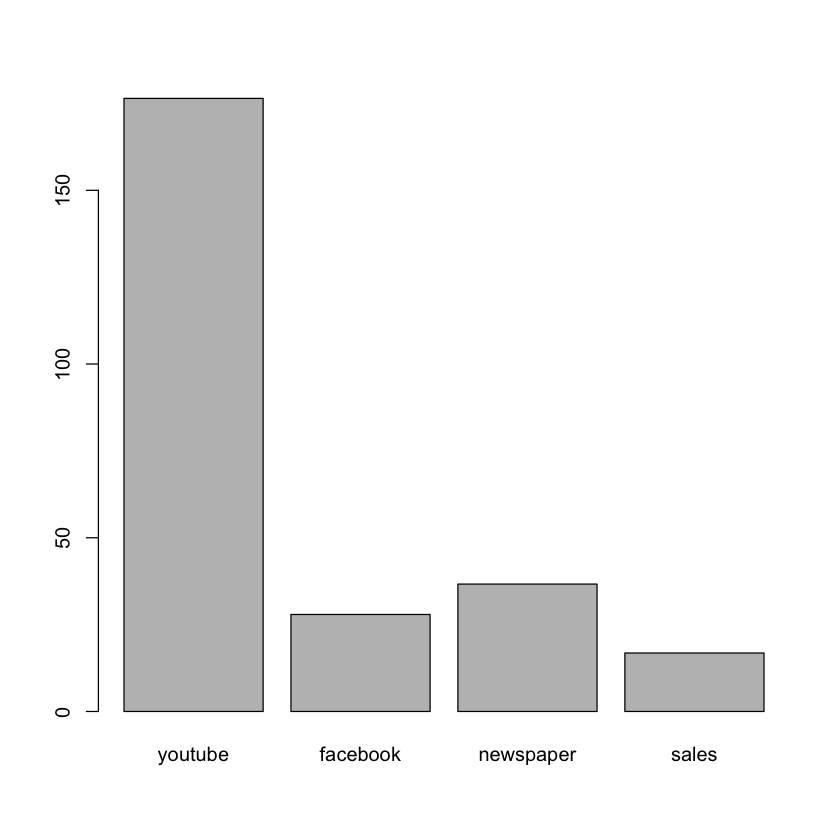

In [27]:
barplot(colMeans(marketing))

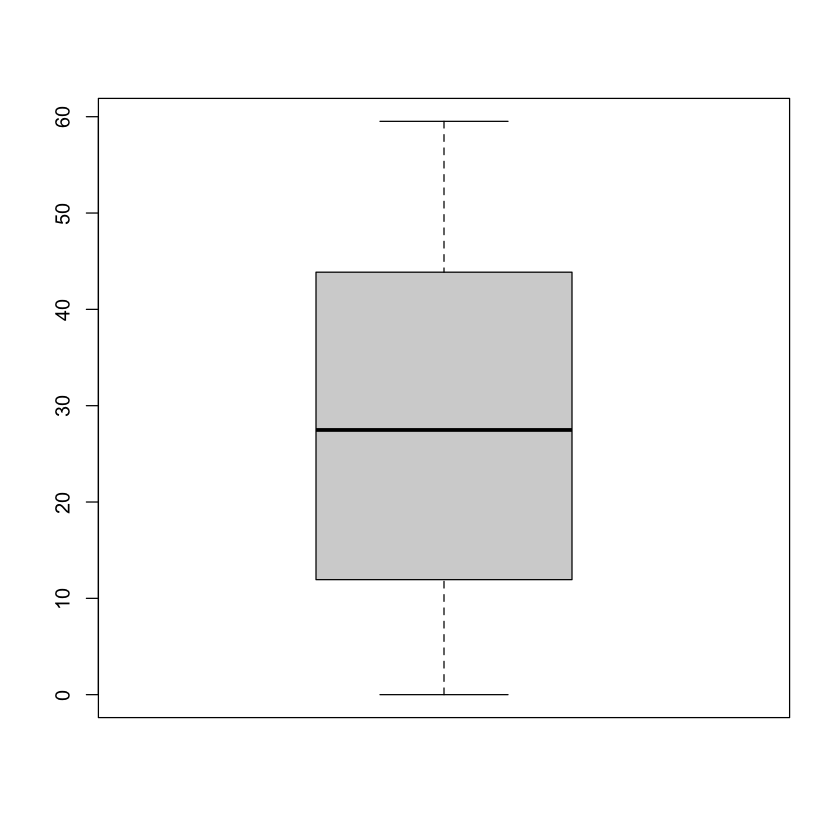

In [28]:
## five number summary
boxplot(marketing$facebook)

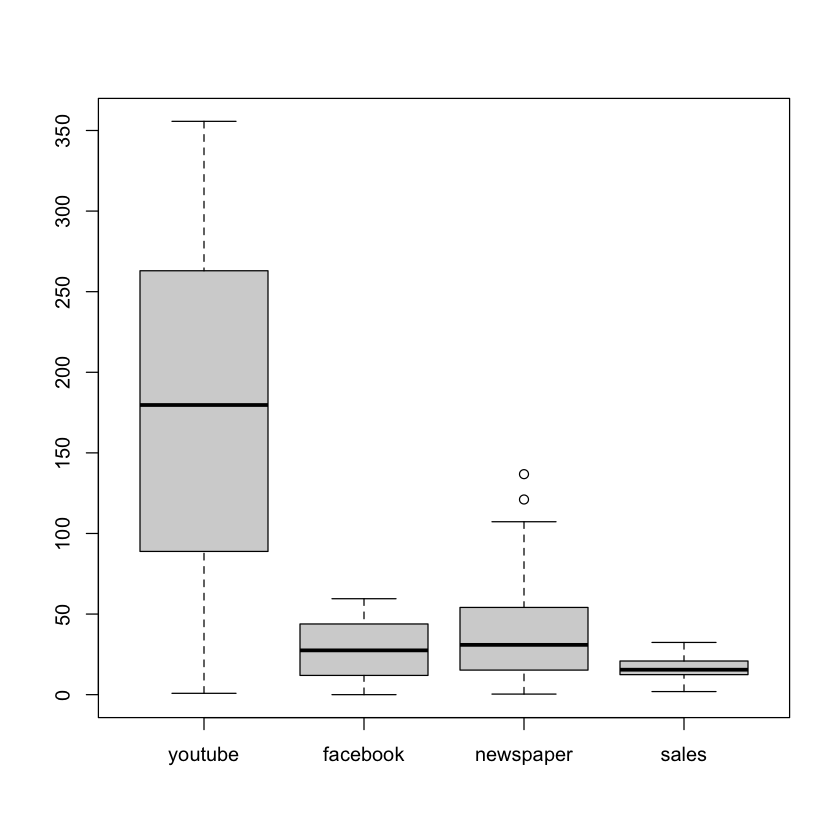

In [29]:
boxplot(marketing)

__Package: `ggplot2`__

More in Chapter 7!

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


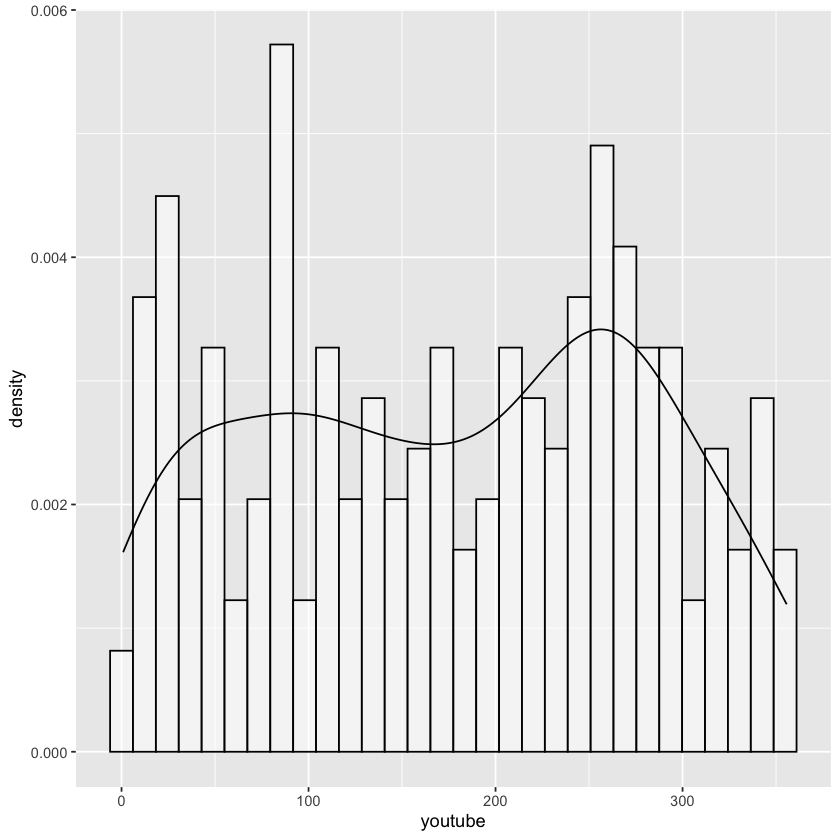

In [30]:
ggplot(data=marketing, aes(x = youtube))+
    geom_histogram(aes(y=after_stat(density)), alpha=0.5, 
                position="identity",fill="white", color="black")+
    geom_density(alpha=.2) 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


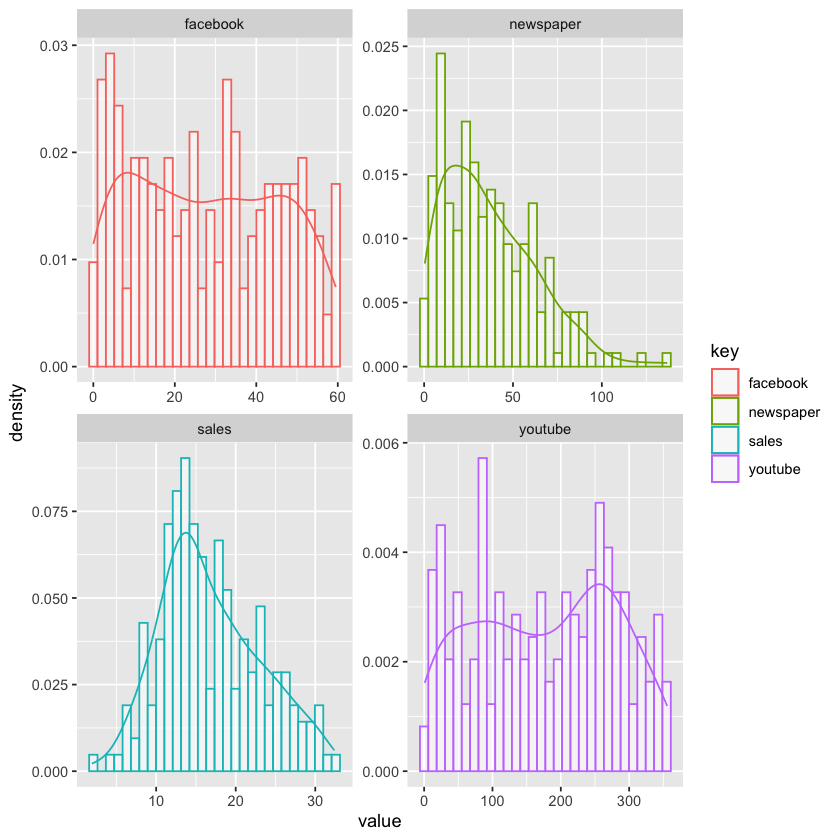

In [31]:
marketing2 <- gather(marketing)
ggplot(marketing2,aes(x = value, color=key)) + 
    facet_wrap(~key,scales = "free") + 
    geom_histogram(aes(y=after_stat(density)), alpha=0.5, 
                position="identity",fill="white")+
    geom_density(alpha=.2) 

__Categorical Data Visualization__

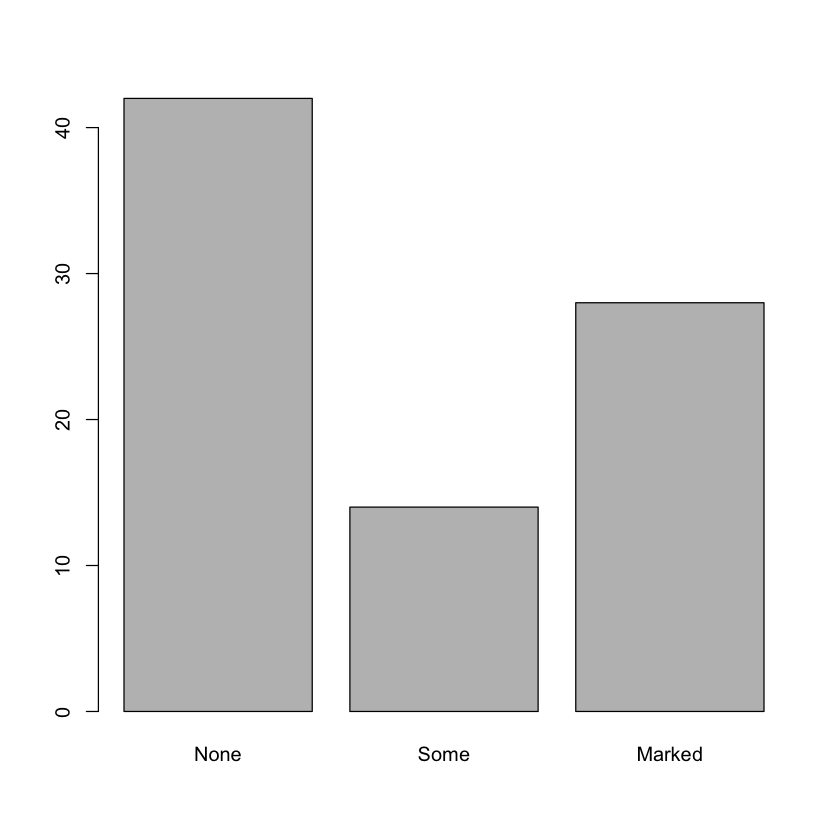

In [32]:
plot(Arthritis$Improved)

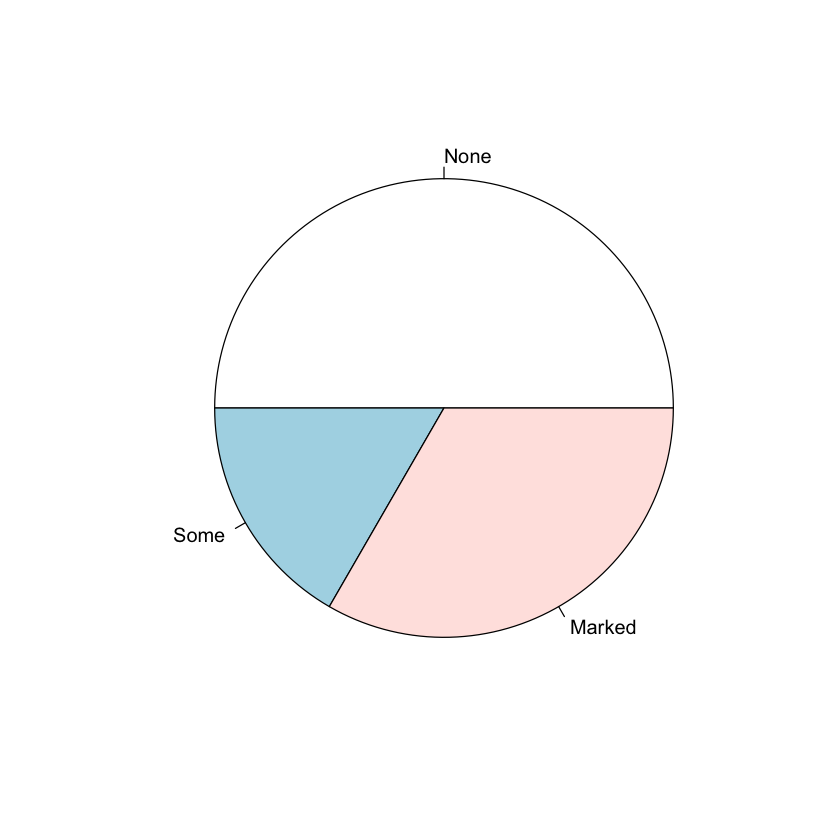

In [33]:
pie(table(Arthritis$Improved))

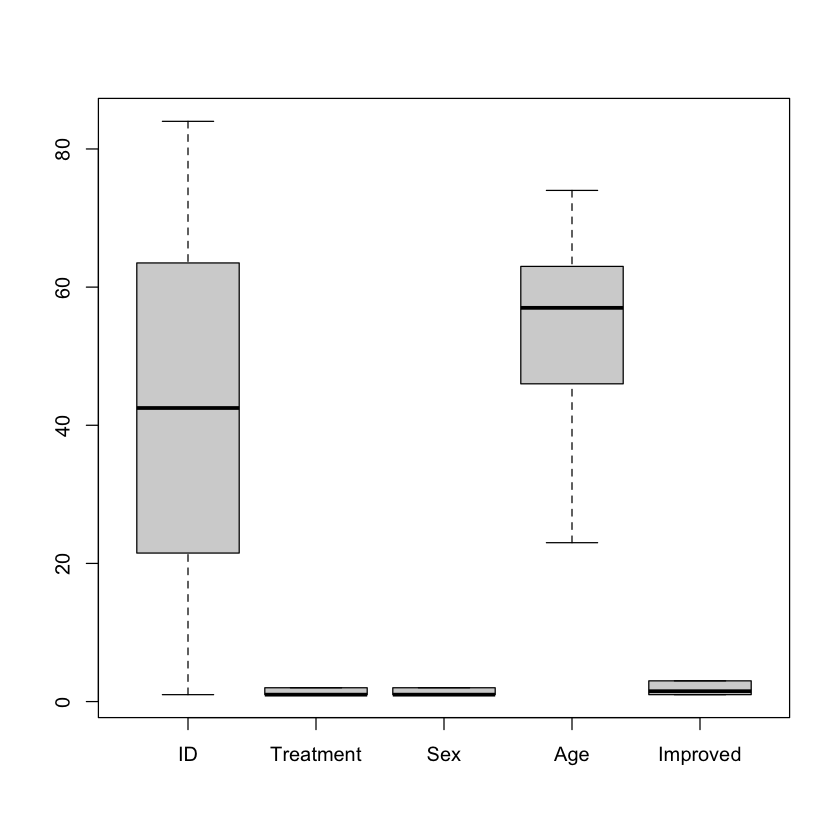

In [34]:
boxplot(Arthritis)

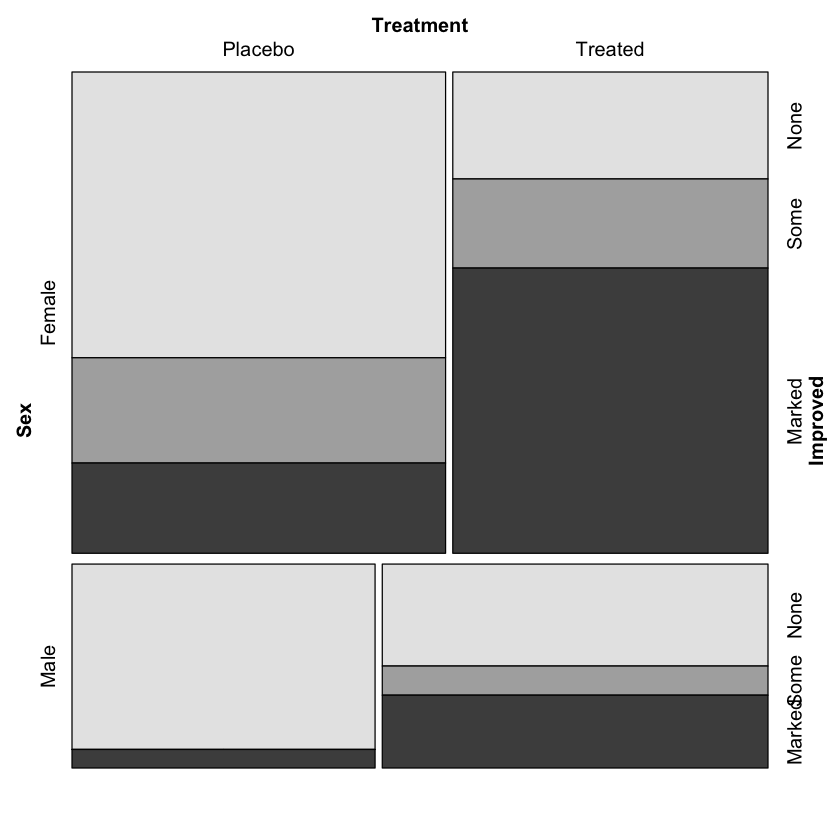

In [35]:
mosaic(Improved ~ Treatment | Sex, data = Arthritis, zero_size = 0)

### <div class="alert alert-block alert-danger"><b>Lab Discussion  </b></div>
Using the tools described above, find the mean, median, mode, and standard deviation for `mice2` data set from `datarium` package. 




In [36]:
library(datarium)
data("mice2", package = "datarium")
head(mice2)

# For example: mean
mean(mice2$before)
colMeans(mice2[,2:3])
# median

# mode

# standard deviation


,id,before,after
,<int>,<dbl>,<dbl>
1,1,187.2,429.5
2,2,194.2,404.4
3,3,231.7,405.6
4,4,200.5,397.2
5,5,201.7,377.9
6,6,235.0,445.8


[1] 200.56

before  after 
200.56 400.04

Represent the data visually with a histogram, scatter plot, box plot. 

##### Your answer:

Is the mean or median more appropriate to use here as a measure of the center of data? Are there any outliers?

##### Your answer:

### <div class="alert alert-block alert-danger"><b>Practice in Birmingham</b>

Now it's your turn to apply what you've learned to a few real-world datasets from Birmingham.

**Part 1: Fire Data Analysis (2015-2017)**

The City of Birmingham has published data on the number of fires that occurred in each zip code from 2015 to 2017 (https://data.birminghamal.gov/dataset/number-of-fires-by-zip-code-2015-2017/resource/862dca35-edce-4e91-95e0-20fe8235a1cd). 
1. Go to the dataset page on the Birmingham Open Data Portal:  
   [Number of Fires by Zip Code (2015-2017)](https://data.birminghamal.gov/dataset/d46de5bf-3454-4349-9d21-26ffa126f787/resource/436af558-0d87-454e-86e5-12adc36acad2/download/number-of-fires-by-zip-codes-2015-2017-csv.csv)

2. On the webpage, locate the **Download** button (usually found near the top of the page or next to the dataset description).

3. Download the dataset as a **CSV file** by clicking the **CSV** option under the "Download" menu.

In [37]:
# Set the working directory (if not already set to the project root)
# setwd("/path/to/your/project/folder")

# Define the URL of the dataset
url <- "https://data.birminghamal.gov/dataset/d46de5bf-3454-4349-9d21-26ffa126f787/resource/436af558-0d87-454e-86e5-12adc36acad2/download/number-of-fires-by-zip-codes-2015-2017-csv.csv"

# Define the destination file path in the "data" folder
# Create subfolder "data" if you do not have in the current directory
destfile <- "data/number-of-fires-by-zip-code-2015-2017.csv"

# Download the file
download.file(url, destfile)

Import the Dataset into R

1. After downloading the CSV file, save it in a known location on your local machine (for example, in a folder named "data" within your project folder).

2. Open R or RStudio.

3. Use the `read.csv()` function to import the dataset into R. Specify the path to the downloaded file as an argument.


In [38]:
# Read the CSV file into R
fire_data <- read.csv(destfile)

# Preview the first few rows of the dataset
head(fire_data)

,Zip.Code,Year,Number.of.Fires
,<int>,<int>,<int>
1,35020,2015,37
2,35022,2015,1
3,35023,2015,12
4,35061,2015,53
5,35064,2015,13
6,35068,2015,1


Perform the following analyses:
1. Calculate the mean, median, and standard deviation for the number of fires in each year.
2. Visualize the data using an appropriate chart or graph.
3. Identify any outliers.
4. What conclusions can you make from this data set?

**Part 2: Community Garden Program Analysis**

In 2018, three Birmingham neighborhood projects were started with a focus of transforming blighted areas into community gardens through a program called "Love Your Block." (You can read more about it here: https://citiesofservice.jhu.edu/love-your-block/love-your-block-birmingham-alabama/).

The data related to the gardens ("love-your-block-lyb-year-3-metrics") can be downloaded from the City of Birmingham website open dataset hub: https://data.birminghamal.gov/dataset/love-your-block-lyb-metrics-year-3-2018

Answer the following: 
1. What proportion of the crops grown were watermelons for the Bush Hills Garden?
2. Create a visualization to display the data.
3. What conclusions can you make about the distribution of crops grown in the community gardens?

**Submission:**

   - Write your code in a separate script (.ipynb) and print it as a PDF or HTML file to submit the results on course Canvas website.